In [17]:
# from definitions import *
# import xlwt
# r=moduli_space_sample(14000, [0.1,0.1,0.4,0.7])#[0.6,0.6,0.6,1] [0.4,0.4,0.4,0.4] [1,1,1,1] 
# # a = 0.1, b = 0.1, c = 0.4, d = 0.7
# # [0.4,0.4,1,1]
# len(r)
# from xlwt import Workbook
# wb = Workbook()
# sheet1 = wb.add_sheet('Sheet 1')

# def clean(i):
#     return (str(np.array(i[0]).tolist())+', '+str(np.array(i[1]).tolist())).replace('[','').replace(']','')

# for count1, pent in enumerate(r):
#     for count2, i in enumerate(pent):
#         sheet1.write(count1, count2, clean(i))

# wb.save('mystery1.xls')

In [18]:
# import xlrd

# workbook = xlrd.open_workbook(r'mystery1.xls')
# worksheet = workbook.sheet_by_name('Sheet 1')

# with open('data/mystery1 clean.txt', 'w+') as f:
#     for i in range(worksheet.nrows-1):
#         for j in range(4):
#             f.write(worksheet.cell(i, j).value)
#             f.write(', ')
#         f.write(worksheet.cell(i, 4).value)
#         f.write('\n')


In [5]:
import time
import numpy as np
from scipy.spatial import distance

#topological data analysis
from ripser import ripser
from persim import plot_diagrams

#plotting and visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.patches import Circle

import matplotlib.pyplot as plt
%matplotlib inline

import math
import cmath
from definitions import pentagon

import random
# import numpy as np

#manifold learning and dim red
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

#topological data analysis
from dreimac import CircularCoords, ToroidalCoords, GeometryExamples, PlotUtils, CircleMapUtils, ComplexProjectiveCoords, ProjectiveMapUtils, GeometryUtils


#plotting and visualization
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output, no_update
import plotly.graph_objects as go
import pandas as pd
import base64

from matplotlib import cm
# import matplotlib.pyplot as plt
# %matplotlib inline

In [19]:
penta2 = np.loadtxt('data/mystery1 clean.txt', delimiter=',')

print(penta2.shape)

(45471, 10)


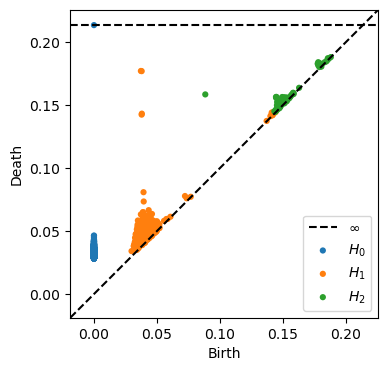

In [20]:
#Using Ripser, we will find the persistence diagrams
#Here I am referecing code from Demo 6 in Day 5 DREimac

n_land = 900
res = ripser(penta2, n_perm = n_land, maxdim=2, coeff =13, thresh = 1.8)
dgms = res['dgms']
fig = plt.figure(figsize = (4,4))
plot_diagrams(dgms)
# fig.savefig('mystery-persistence')

In [21]:
pers1 = dgms[1][:,1] - dgms[1][:,0]
pers2 = dgms[2][:,1] - dgms[2][:,0]

pers1_sorted = np.sort(pers1)[::-1]
pers2_sorted = np.sort(pers2[pers2 < np.Inf])[::-1]

print('Persistence of top 10 1-d features:\n', np.around(pers1_sorted[0:10],decimals=2), '\n')
print('Persistence of top 10 2-d features:\n', np.around(pers2_sorted[0:10],decimals=2))

Persistence of top 10 1-d features:
 [0.14 0.14 0.11 0.1  0.04 0.03 0.03 0.03 0.03 0.02] 

Persistence of top 10 2-d features:
 [0.07 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.  ]


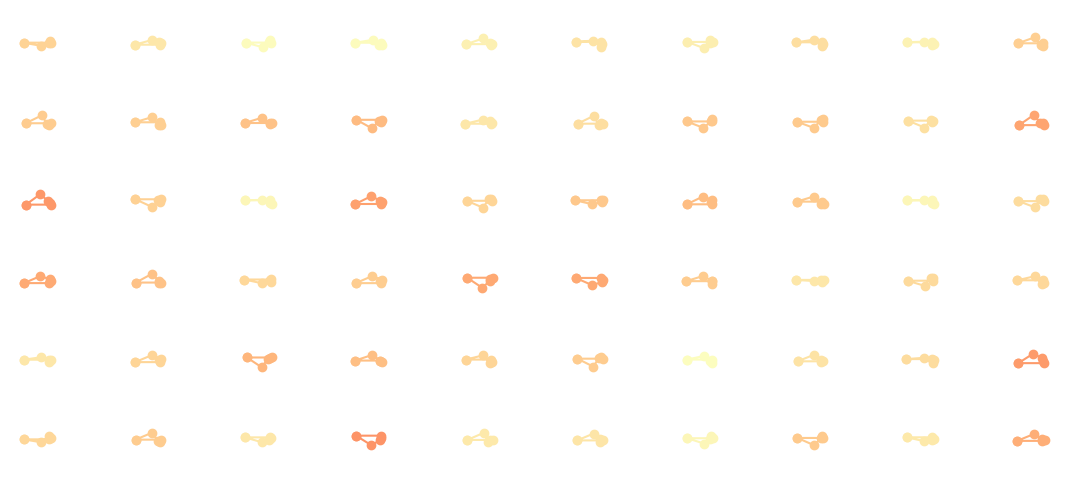

In [22]:
#Energy Computation

angle_data = np.zeros((penta2.shape[0],5)) # internal angles

for i in range(5):
    ii = (2*i -2)%10
    jj = (2*i - 1)%10
    u = penta2[:, [ii, jj]]
    
    ii = (2*i)%10
    jj = (2*i + 1)%10
    v = penta2[:, [ii , jj]]
    
    ii = (2*i + 2)%10
    jj = (2*i + 3)%10
    w = penta2[:, [ii, jj]]
    
    z = np.sum((u - v)*(w-v), axis = 1)
    
    angle_data[:,i]  = np.arccos( np.minimum(z,1) )
    
energy = np.sum((angle_data - (3/5)*np.pi)**2 , axis = 1)

# plot sample pentagons
plt.figure(figsize=(14,6))
for i in range(60):
    ind = random.randint(0, penta2.shape[0])
    x = penta2[ind].reshape(5,2).T
    cent = np.mean(x,axis=1)
    plt.subplot(6,10,i+1)
    plt.plot(x[0,range(-1,5)], x[1,range(-1,5)] , '-o', c= cm.magma(energy[ind]/np.max(energy)))
    plt.axis('square')
    plt.axis('off')
    plt.xlim(cent[0]-1.3,cent[0]+1.3);
    plt.ylim(cent[1]-1.3,cent[1]+1.3);

In [23]:
#PCA
pca = PCA(n_components=5)
data_pca = pca.fit(penta2).transform(penta2)

print('Explained Variance', pca.explained_variance_ratio_)

fig = go.Figure(data=[go.Scatter3d(
    x=data_pca[:,0], y=data_pca[:,1], z=data_pca[:,2], 
    mode ='markers', 
    marker=dict(size = 3, color =energy, colorscale='plasma' , opacity = 1)
)])

fig.update_layout(autosize=False, width=700, height=700)  

fig.show()

Explained Variance [0.71039937 0.13931273 0.098517   0.02482095 0.02082192]


In [ ]:
n_lands = 900

cc = CircularCoords(dist_mat, n_landmarks= n_lands, distance_matrix = True)

coho_classes = [0, 1, 2, 3]

circular_coords = []

for i in coho_classes:
    circular_coords.append(cc.get_coordinates(perc = 0.6, cocycle_idx=i, standard_range= False))


In [ ]:
#Applying Circular coords and doing TDR

thetas= CircleMapUtils.linear_combination(np.array(circular_coords), [[1,0,0,0], [0,1,0,0],[0,0,1,0], [0,0,0,1], [0,0,0,1],[0,0,1,0]])

theta1 = CircleMapUtils.center(thetas[0])
theta2 = CircleMapUtils.center(thetas[1])
theta3 = CircleMapUtils.center(thetas[2])
theta4 = CircleMapUtils.center(thetas[3])


# Plot the data using the computed circular coordintaes, and colors given by pentagon energy
fig = go.Figure(data=[go.Scatter3d(
    x=theta1, y=theta2, z=theta6, 
    mode ='markers', 
    marker=dict(size = 3, color =energy[pointcloud_permutation], colorscale='plasma')
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show()